In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Question 2

### Setup

In [52]:
t = np.linspace(0,1,150)

### Function Definitions

In [53]:
def standard_basis(n):
    delta = 1/(2**n)
    ei = np.sqrt(1/delta)*np.ones(t.shape)
    e = np.array([ei]*2**n)
    for i in range(2**n):
        e[i][(t<i*delta) | (t>(i+1)*delta)] = 0
    return e

In [54]:
def H2n(n):
    if n < 0:
        raise ValueError("n should be a non-negative integer.")
    if n == 0:
        return np.array([1])
    Hprev = H2n(n-1)
    return 1/np.sqrt(2) * np.block([[Hprev, Hprev],
                                    [Hprev, -Hprev]])

In [55]:
def WH2n(H2n):
    # compute the difference between successive elements in each row, 
    # sum all differences which are not 0 (aka a sign change),
    # and order the rows from lowest to highest number of sign changes.
    return np.take(H2n, np.argsort(np.sum(np.diff(H2n,axis=1) != 0, axis=1)), 0)

In [56]:
def Haar2n(n):
    if n < 0:
        raise ValueError("n should be a non-negative integer.")
    if n == 0:
        return np.array([1])
    Hprev = Haar2n(n-1)
    first_block = np.kron(Hprev, np.array([[1],[1]]))
    second_block = np.kron(np.eye(2**(n-1),2**(n-1)), np.array([[1],[-1]]))
    return 1/np.sqrt(2) * np.block([first_block, second_block])

### Families Generation

In [57]:
for n in range(2,7):
    h = H2n(n).T @ standard_basis(n)
    for i in range(2**n):
        plt.figure()
        plt.plot(t, h[i])
        plt.xlabel('t')
        plt.ylabel(r'$h_{i}(t)$')
        plt.title(r'$h_{' + f'{i+1}' + rf'}}(t), n={n}$')
        plt.grid()
        plt.savefig(f'plots/H/n{n}/h{i+1}')
        plt.close()

In [58]:
for n in range(2,7):
    print(f"n:{n}")
    h = WH2n(H2n(n)).T @ standard_basis(n)
    for i in range(2**n):
        plt.figure()
        plt.plot(t, h[i])
        plt.xlabel('t')
        plt.ylabel(r'$hw_{i}(t)$')
        plt.title(r'$hw_{' + f'{i+1}' + rf'}}(t), n={n}$')
        plt.grid()
        plt.savefig(f'plots/WH/n{n}/h{i+1}')
        plt.close()

n:2
n:3
n:4
n:5
n:6


In [19]:
for n in range(2,7):
    print(f"n:{n}")
    h = Haar2n(n).T @ standard_basis(n)
    for i in range(2**n):
        plt.figure()
        plt.plot(t, h[i])
        plt.xlabel('t')
        plt.ylabel(r'$ha_{i}(t)$')
        plt.title(r'$ha_{' + f'{i+1}' + rf'}}(t), n={n}$')
        plt.grid()
        plt.savefig(f'plots/Haar/n{n}/h{i+1}')
        plt.close()

n:2
n:3
n:4
n:5
n:6


### Performance on $\phi\left(t\right)=t\exp\left(t\right)$

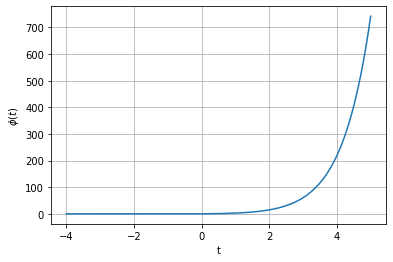

In [95]:
ttag = -4 + 9*t # move [0,1] to [-4,5]
phi = (ttag)*np.exp(ttag)

plt.plot(ttag, phi)
plt.grid()
plt.xlabel('t')
plt.ylabel(r'$\phi\left(t\right)$')
plt.show()

In [96]:
n = 2

# basis transformation
H=H2n(n)
WH=WH2n(H)
Ha=Haar2n(n)

# function families
SBfam=standard_basis(n)
Hfam = H.T@SBfam
WHfam = WH.T@SBfam
Hafam = Ha.T@SBfam

SBCoeff = 1/len(t) * SBfam@phi.T
HCoeff = H.T@SBCoeff.T
WHCoeff = WH.T@SBCoeff.T
HaCoeff = Ha.T@SBCoeff.T

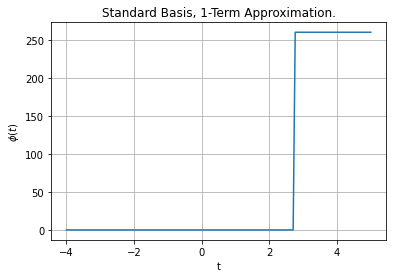

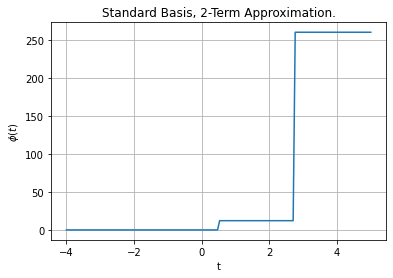

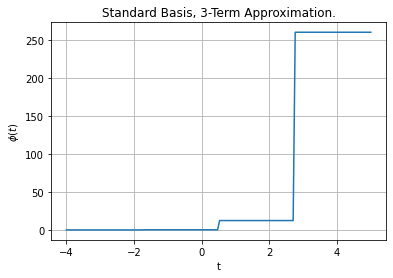

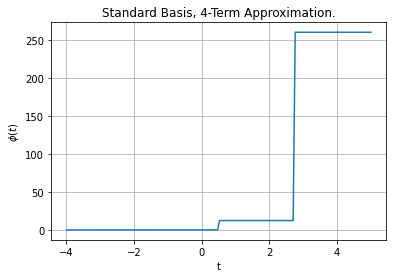

[9858.95720283 9821.9799911  9821.97246215 9821.96675388]


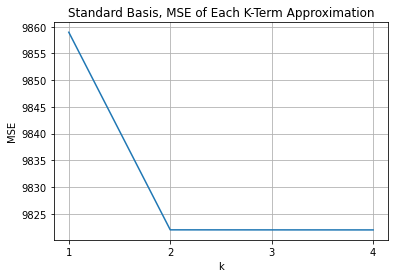

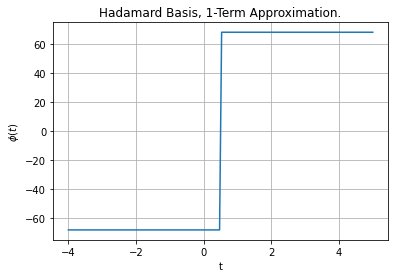

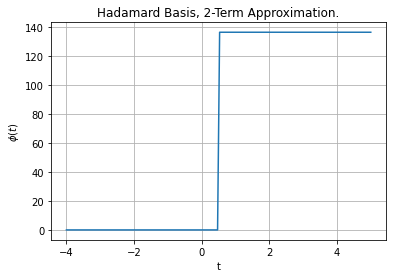

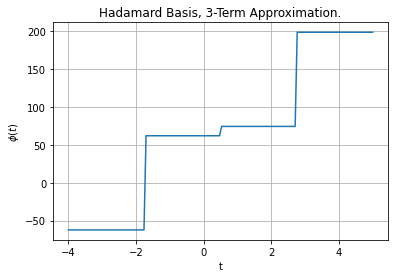

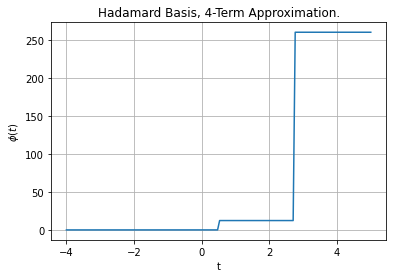

[22147.46213684 17518.70654788 13669.64083934  9821.96675388]


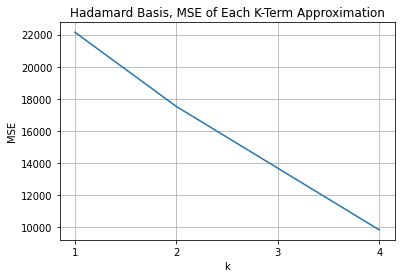

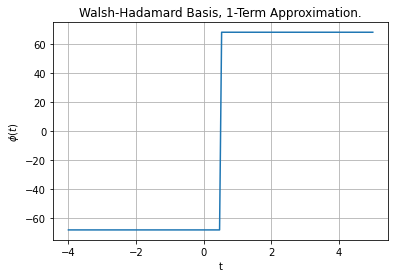

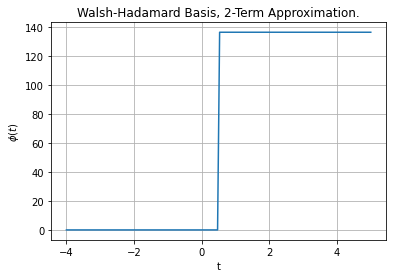

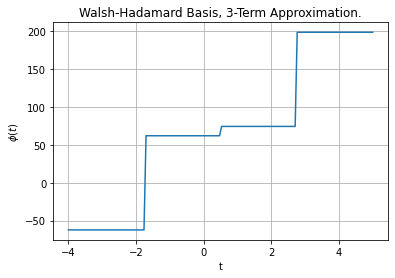

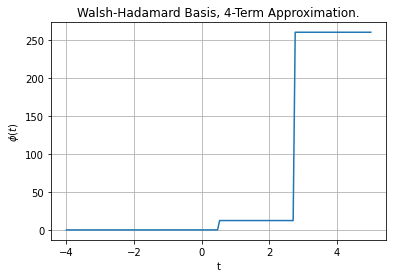

[22147.46213684 17518.70654788 13669.64083934  9821.96675388]


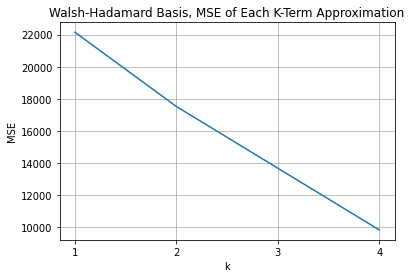

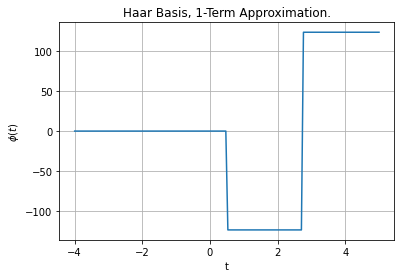

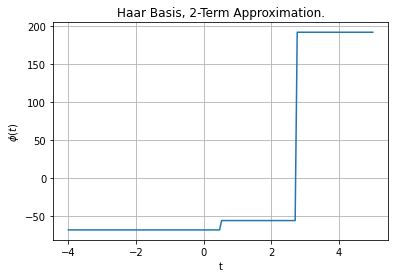

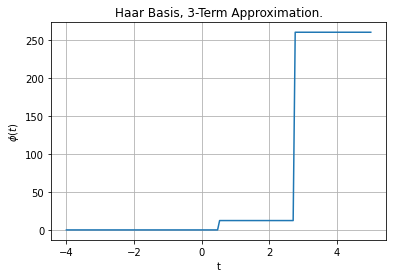

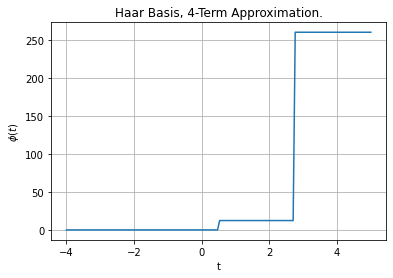

[19101.5915711  14450.72240574  9821.96681678  9821.96675388]


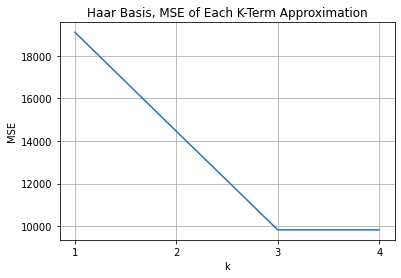

In [100]:
families = [(SBCoeff,SBfam,'Standard Basis'),(HCoeff,Hfam,'Hadamard Basis'),(WHCoeff,WHfam,'Walsh-Hadamard Basis'),(HaCoeff,Hafam,'Haar Basis')]

for base_coeff, base_fam, base_name in families:

    order = np.argsort(np.abs(base_coeff))[::-1]
    ordered_coeff = np.take(base_coeff, order)
    ordered_fam = base_fam[order,:]
    for k in range(2**n):
        kapprx_coef = ordered_coeff[:k+1]
        kapprx_fam = ordered_fam[:k+1]
        phi_apprx_k = kapprx_coef@kapprx_fam
        plt.figure()
        plt.plot(ttag, phi_apprx_k)
        plt.grid()
        plt.xlabel('t')
        plt.ylabel(r'$\phi\left(t\right)$')
        plt.title(f'{base_name}, {k+1}-Term Approximation.')
        plt.show()
        
    phi_squared = 1/len(t) * np.sum(phi**2)
    print(phi_squared - np.cumsum(ordered_coeff**2))
    plt.figure()
    plt.plot(range(1,2**n+1), phi_squared - np.cumsum(ordered_coeff**2))
    plt.grid()
    plt.xticks([1,2,3,4])
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title(f'{base_name}, MSE of Each K-Term Approximation')
    plt.show()